# Lecture: DQN for the CartPole environment

The CartPole environment from Gymnasium is a classic control problem where the goal is to balance a pole on a moving cart by applying forces to the cart. The agent receives observations such as the cart position, cart velocity, pole angle, and pole angular velocity, and must learn to keep the pole upright for as long as possible without it falling or the cart moving out of bounds.

<img src="images/cart_pole.gif" alt="CartPole balancing" width="400"/>

## Environment Overview

- **Goal:** Balance a pole on a moving cart by applying forces left or right.
- **Observation space:** 4 continuous values
  - Cart Position
  - Cart Velocity
  - Pole Angle
  - Pole Velocity at Tip
- **Action space:** Discrete with 2 actions
  - 0: Push cart to the left
  - 1: Push cart to the right
- **Episode termination:**
  - Pole angle is more than ±12°
  - Cart position goes beyond ±2.4 units
  - Episode length reaches 500 steps (solved if agent balances for 500 steps)

Run the following cell only if you are working with google colab to copy the required .py file in the root directory. If you are working locally just ignore this cell!

In [ ]:
!git clone https://github.com/Fjoelsak/RL.git
!cp RL/06_Value_Function_Approximation/DQN_agent.py ./
!mkdir images
!cp RL/06_Value_Function_Approximation/images/cart_pole.gif ./images

### Get to know the environment

Try out the environment with sample actions in a standard RL data loop.

In [ ]:
import gymnasium as gym
import time

# Number of steps you run the agent for
num_steps = 100

env = gym.make("CartPole-v1", render_mode="human")
obs, _ = env.reset()

for step in range(num_steps):
    # take random action, but you can also do something more intelligent
    # action = my_intelligent_agent_fn(obs)
    action = env.action_space.sample()

    # apply the action
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # Render the env
    env.render()

    # Wait a bit before the next frame unless you want to see a crazy fast video
    time.sleep(0.01)

    # If the epsiode is up, then start another one
    if done:
        env.reset()


# Close the env
env.close()

## DQN training

Train the agent with the given config. Note that altering hyperparameters can impact the training time hugely. Hence, think about the adaptions and their possible impact before just trying things out.

In [ ]:
from DQN_agent import DQNAgent
import gymnasium as gym

In [ ]:
# Konfigurationen für den DQN-,DDQN und PER-Algorithmus.
config = {
    "EPISODES": 800,
    "REPLAY_MEMORY_SIZE": 50_000,
    "MINIMUM_REPLAY_MEMORY": 1_000,
    "TRAIN_FREQUENCY": 2,
    "MINIBATCH_SIZE": 64,
    "UPDATE_TARGETNW_STEPS": 1_000,
    "LEARNING_RATE": 0.003,
    "EPSILON": 1,
    "EPSILON_DECAY": 0.99,
    "MINIMUM_EPSILON": 0.001,
    "DISCOUNT": 0.99,
    "VISUALIZATION": False,
    "LOGS": 'logs/DQN_run4/'
}

env = gym.make("CartPole-v1")

In [ ]:
# Training des Agenten
agent = DQNAgent(env, config)
agent.train(env)

## DQN Testing

Test the trained agent by simulating episodes with the learned policy.

In [1]:
from DQN_agent import DQNAgent
import gymnasium as gym

env = gym.make("CartPole-v1")

# Konfigurationen für den DQN-Algo.
config = {
    "EPISODES": 800,
    "REPLAY_MEMORY_SIZE": 50_000,
    "MINIMUM_REPLAY_MEMORY": 1_000,
    "TRAIN_FREQUENCY": 2,
    "MINIBATCH_SIZE": 64,
    "UPDATE_TARGETNW_STEPS": 1_000,
    "LEARNING_RATE": 0.001,
    "EPSILON": 1,
    "EPSILON_DECAY": 0.99,
    "MINIMUM_EPSILON": 0.001,
    "DISCOUNT": 0.99,
    "VISUALIZATION": False,
    "LOGS": 'logs/DQN_run2/'
}
agent = DQNAgent(env, config)

In [2]:
env = gym.make("CartPole-v1", render_mode="human")
obs, _ = env.reset()

In [3]:
agent.test(env, 'logs/DQN_run4/500.0_agent', TOTAL_EPISODES = 1)
env.close()

EPISODE_REWARD 500.0
1 EPISODES WON AMONG 1 EPISODES


## Plotting the learning curves, average rewards and epsilon distribution

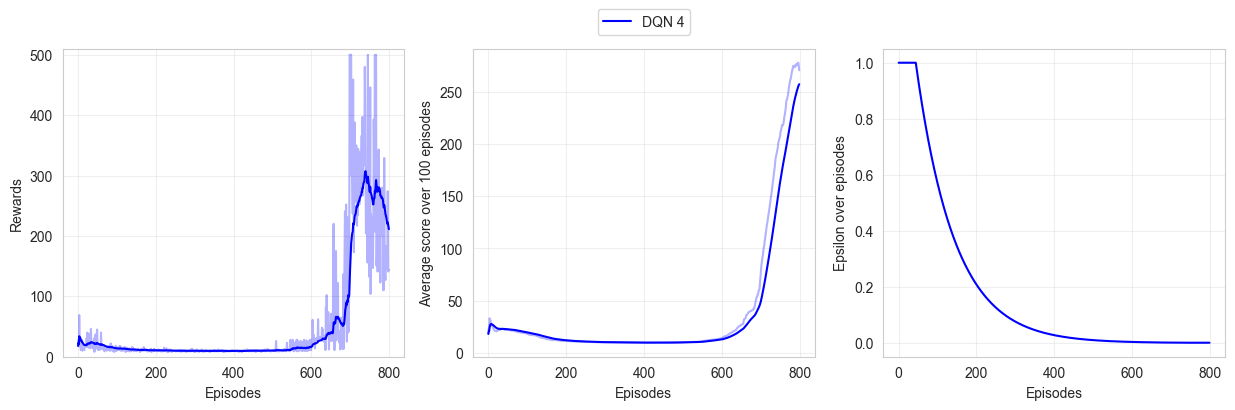

In [5]:
import pandas as pd
from DQN_agent import plot_trainingsinformation

data_DQN_4 = pd.read_csv(r'logs/DQN_run4/results.csv')
plot_trainingsinformation([data_DQN_4], ['DQN 4'], ['blue'], ylim = 510,);